In [1]:
import time

In [2]:
import numpy as np

In [3]:
!pip3 list

Package            Version   
------------------ ----------
appnope            0.1.0     
arrow              0.4.2     
attrs              19.3.0    
backcall           0.1.0     
bleach             3.1.0     
caldav             0.6.1     
certifi            2018.11.29
chardet            3.0.4     
cycler             0.10.0    
decorator          4.4.1     
defusedxml         0.6.0     
entrypoints        0.3       
ics                0.4       
idna               2.8       
importlib-metadata 1.2.0     
ipykernel          5.1.3     
ipython            7.10.1    
ipython-genutils   0.2.0     
ipywidgets         7.5.1     
jedi               0.15.1    
Jinja2             2.10.3    
jsonschema         3.2.0     
jupyter            1.0.0     
jupyter-client     5.3.4     
jupyter-console    6.0.0     
jupyter-core       4.6.1     
kiwisolver         1.0.1     
lxml               4.3.3     
MarkupSafe         1.1.1     
MathLab            1.0.0     
matplotlib         3.0.3     
mistune   

In [4]:
import time
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [5]:
# %matplotlib notebook
%matplotlib inline

In [6]:
origin_data = pd.read_csv('20190917OTRSKanban.csv', sep=';')

In [7]:
origin_data.head()

,Ticketnumber,CREATE_TIME,First_Assignment,CLOSE_TIME,MoveToBackoffice,Minutes until Assignment,Minutes until Close,Minutes of Touchtime
0,51139776,12.06.2019 10:10:08,03.09.2019 11:34:19,17.09.2019 09:19:43,12.06.2019 10:29:33,119604,139630,60.0
1,51152439,06.08.2019 14:00:11,07.08.2019 10:48:44,17.09.2019 09:28:16,20.08.2019 15:54:19,1249,60208,78.0
2,51153138,15.08.2019 09:00:13,15.08.2019 11:11:48,17.09.2019 06:14:11,NaN,132,47354,NaN
3,51154241,29.08.2019 11:00:21,16.09.2019 10:44:21,17.09.2019 15:51:53,NaN,25904,27652,20.0
4,51154880,04.09.2019 15:00:30,04.09.2019 15:45:21,17.09.2019 15:55:47,NaN,45,18775,19.0


In [8]:
# origin_data['InterpretedStartTime'] = np.nan

In [9]:
# type(origin_data["InterpretedStartTime"][0])

In [10]:
# Datentyp der neuen Spalte soll datum sein

In [11]:
# Umwandlung von Sting in Datetime

# General treatment of times

In [12]:
CompareDateTime = np.datetime64("2019-09-03T15:00:00")
OtherDateTime = pd.Timestamp(year=2019, month=9, day=3, hour=15, minute=0, second=0)

print( type(CompareDateTime),  CompareDateTime )
print( type(OtherDateTime), OtherDateTime )
print( CompareDateTime == OtherDateTime )
OtherDateTime = OtherDateTime.replace( second=1 )
print (CompareDateTime == OtherDateTime)

<class 'numpy.datetime64'> 2019-09-03T15:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2019-09-03 15:00:00
True
False


## A little test to make sure we convert the input format correctly

In [13]:
expected_date_time = np.datetime64("2019-09-03T15:00:00") 

date_time_from_other_system = "03.09.2019 15:00:00"

interpreted_date_time = pd.datetime.strptime(date_time_from_other_system,
                                             "%d.%m.%Y %H:%M:%S")

assert expected_date_time == interpreted_date_time

interpreted_date_time = pd.Timestamp(interpreted_date_time)
assert interpreted_date_time == expected_date_time

interpreted_date_time = interpreted_date_time.replace( second = 1 )

assert interpreted_date_time != expected_date_time, "Should be different by now"


## Now make this a function

In [14]:
def date_converter_for_otrs_de ( date_as_text ):
    if type(date_as_text) != str and np.isnan(date_as_text):
        return np.nan
    converted_date = pd.datetime.strptime(date_as_text, "%d.%m.%Y %H:%M:%S") 
    return pd.Timestamp( converted_date )
    

## And test the function

In [15]:
print (expected_date_time)
print(date_converter_for_otrs_de( "03.09.2019 15:00:00" ))
assert expected_date_time == date_converter_for_otrs_de( "03.09.2019 15:00:00" )
assert expected_date_time != date_converter_for_otrs_de( "03.09.2019 15:00:01" )    


2019-09-03T15:00:00
2019-09-03 15:00:00


## If NaN in source, return NaN

In [16]:
assert np.isnan( date_converter_for_otrs_de( np.nan ) )



## Do we still have a valid dataframe?

In [17]:
origin_data.head()

,Ticketnumber,CREATE_TIME,First_Assignment,CLOSE_TIME,MoveToBackoffice,Minutes until Assignment,Minutes until Close,Minutes of Touchtime
0,51139776,12.06.2019 10:10:08,03.09.2019 11:34:19,17.09.2019 09:19:43,12.06.2019 10:29:33,119604,139630,60.0
1,51152439,06.08.2019 14:00:11,07.08.2019 10:48:44,17.09.2019 09:28:16,20.08.2019 15:54:19,1249,60208,78.0
2,51153138,15.08.2019 09:00:13,15.08.2019 11:11:48,17.09.2019 06:14:11,NaN,132,47354,NaN
3,51154241,29.08.2019 11:00:21,16.09.2019 10:44:21,17.09.2019 15:51:53,NaN,25904,27652,20.0
4,51154880,04.09.2019 15:00:30,04.09.2019 15:45:21,17.09.2019 15:55:47,NaN,45,18775,19.0


In [18]:
type(origin_data['MoveToBackoffice'][2])

float

In [19]:
origin_data['CREATE_TIME'].map(date_converter_for_otrs_de)

0    2019-06-12 10:10:08
1    2019-08-06 14:00:11
2    2019-08-15 09:00:13
3    2019-08-29 11:00:21
4    2019-09-04 15:00:30
5    2019-09-09 11:20:11
6    2019-09-09 12:00:10
7    2019-09-09 13:50:09
8    2019-09-10 13:20:09
9    2019-09-11 16:10:08
10   2019-09-12 10:10:07
11   2019-09-12 16:30:09
12   2019-09-13 14:30:09
13   2019-09-16 09:50:07
14   2019-09-16 10:50:09
15   2019-09-16 14:10:07
16   2019-09-16 14:40:07
17   2019-09-16 15:30:08
18   2019-09-16 16:00:15
19   2019-09-16 18:20:07
20   2019-09-17 07:00:10
21   2019-09-17 07:20:06
22   2019-09-17 07:50:12
23   2019-09-17 08:00:07
24   2019-09-17 08:40:09
25   2019-09-17 08:40:14
26   2019-09-17 08:50:09
27   2019-09-17 09:10:11
28   2019-09-17 09:30:09
29   2019-09-17 10:50:08
30   2019-09-17 11:20:07
31   2019-09-17 11:30:14
32   2019-09-17 11:40:08
33   2019-09-17 11:50:07
34   2019-09-17 11:50:10
35   2019-09-17 12:00:07
36   2019-09-17 12:00:09
37   2019-09-17 12:00:10
38   2019-09-17 12:20:11
39   2019-09-17 12:40:10


In [20]:
origin_data['InterpretedStartTime'] = origin_data['CREATE_TIME'].map(date_converter_for_otrs_de)

In [21]:
origin_data['InterpretedEndTime'] = origin_data['CLOSE_TIME'].map(date_converter_for_otrs_de)

In [22]:
origin_data.head()

,Ticketnumber,CREATE_TIME,First_Assignment,CLOSE_TIME,MoveToBackoffice,Minutes until Assignment,Minutes until Close,Minutes of Touchtime,InterpretedStartTime,InterpretedEndTime
0,51139776,12.06.2019 10:10:08,03.09.2019 11:34:19,17.09.2019 09:19:43,12.06.2019 10:29:33,119604,139630,60.0,2019-06-12 10:10:08,2019-09-17 09:19:43
1,51152439,06.08.2019 14:00:11,07.08.2019 10:48:44,17.09.2019 09:28:16,20.08.2019 15:54:19,1249,60208,78.0,2019-08-06 14:00:11,2019-09-17 09:28:16
2,51153138,15.08.2019 09:00:13,15.08.2019 11:11:48,17.09.2019 06:14:11,NaN,132,47354,NaN,2019-08-15 09:00:13,2019-09-17 06:14:11
3,51154241,29.08.2019 11:00:21,16.09.2019 10:44:21,17.09.2019 15:51:53,NaN,25904,27652,20.0,2019-08-29 11:00:21,2019-09-17 15:51:53
4,51154880,04.09.2019 15:00:30,04.09.2019 15:45:21,17.09.2019 15:55:47,NaN,45,18775,19.0,2019-09-04 15:00:30,2019-09-17 15:55:47


In [23]:
origin_data.count()

Ticketnumber                55
CREATE_TIME                 55
First_Assignment            55
CLOSE_TIME                  55
MoveToBackoffice            10
Minutes until Assignment    55
Minutes until Close         55
Minutes of Touchtime        45
InterpretedStartTime        55
InterpretedEndTime          55
dtype: int64

In [24]:
# vectorize

# funky = np.vectorize(date_converter_for_otrs_de)

# funky( origin_data['CREATE_TIME'])

In [25]:
origin_data['duration'] = origin_data['InterpretedEndTime']-origin_data['InterpretedStartTime']
#origin_data.head('Ticketnumber')

In [26]:
origin_data.duration

0    96 days 23:09:35
1    41 days 19:28:05
2    32 days 21:13:58
3    19 days 04:51:32
4    13 days 00:55:17
5     7 days 22:21:58
6     7 days 19:35:00
7     7 days 21:36:04
8     7 days 01:56:40
9     5 days 19:09:49
10    5 days 05:46:10
11    4 days 17:01:35
12    3 days 18:49:00
13    0 days 22:04:24
14    1 days 04:42:54
15    0 days 18:03:59
16    0 days 23:15:02
17    0 days 16:20:42
18    1 days 00:16:43
19    0 days 11:57:38
20    0 days 04:45:35
21    0 days 01:26:00
22    0 days 00:34:19
23    0 days 05:05:26
24    0 days 00:38:11
25    0 days 05:29:22
26    0 days 07:26:59
27    0 days 00:25:31
28    0 days 05:34:46
29    0 days 00:44:24
30    0 days 04:23:43
31    0 days 00:35:20
32    0 days 01:00:49
33    0 days 01:21:58
34    0 days 00:40:01
35    0 days 00:29:41
36    0 days 00:29:21
37    0 days 01:33:36
38    0 days 00:08:18
39    0 days 00:27:15
40    0 days 00:00:32
41    0 days 00:00:39
42    0 days 00:16:40
43    0 days 01:47:33
44    0 days 01:47:42
45    0 da

In [27]:
pd.to_numeric(origin_data['duration']) # returns nanoseconds

0     8377775000000000
1     3612485000000000
2     2841238000000000
3     1659092000000000
4     1126517000000000
5      685318000000000
6      675300000000000
7      682564000000000
8      611800000000000
9      500989000000000
10     452770000000000
11     406895000000000
12     326940000000000
13      79464000000000
14     103374000000000
15      65039000000000
16      83702000000000
17      58842000000000
18      87403000000000
19      43058000000000
20      17135000000000
21       5160000000000
22       2059000000000
23      18326000000000
24       2291000000000
25      19762000000000
26      26819000000000
27       1531000000000
28      20086000000000
29       2664000000000
30      15823000000000
31       2120000000000
32       3649000000000
33       4918000000000
34       2401000000000
35       1781000000000
36       1761000000000
37       5616000000000
38        498000000000
39       1635000000000
40         32000000000
41         39000000000
42       1000000000000
43       64

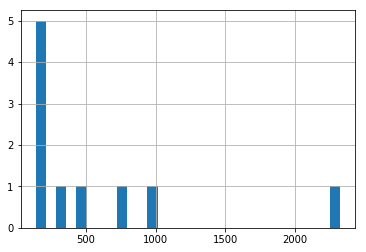

In [28]:
nanoseconds_per_hour = 1000000000*60*60

((pd.to_numeric(origin_data['duration'][0:10])/nanoseconds_per_hour)).hist(bins = 30)

In [29]:
origin_data['duration_hours'] = pd.to_numeric(origin_data['duration']) / nanoseconds_per_hour

#Linksammlung

https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html

https://www.journaldev.com/23365/python-string-to-datetime-strptime#python-strptime-format-directives


In [30]:
origin_data.head()

,Ticketnumber,CREATE_TIME,First_Assignment,CLOSE_TIME,MoveToBackoffice,Minutes until Assignment,Minutes until Close,Minutes of Touchtime,InterpretedStartTime,InterpretedEndTime,duration,duration_hours
0,51139776,12.06.2019 10:10:08,03.09.2019 11:34:19,17.09.2019 09:19:43,12.06.2019 10:29:33,119604,139630,60.0,2019-06-12 10:10:08,2019-09-17 09:19:43,96 days 23:09:35,2327.159722
1,51152439,06.08.2019 14:00:11,07.08.2019 10:48:44,17.09.2019 09:28:16,20.08.2019 15:54:19,1249,60208,78.0,2019-08-06 14:00:11,2019-09-17 09:28:16,41 days 19:28:05,1003.468056
2,51153138,15.08.2019 09:00:13,15.08.2019 11:11:48,17.09.2019 06:14:11,NaN,132,47354,NaN,2019-08-15 09:00:13,2019-09-17 06:14:11,32 days 21:13:58,789.232778
3,51154241,29.08.2019 11:00:21,16.09.2019 10:44:21,17.09.2019 15:51:53,NaN,25904,27652,20.0,2019-08-29 11:00:21,2019-09-17 15:51:53,19 days 04:51:32,460.858889
4,51154880,04.09.2019 15:00:30,04.09.2019 15:45:21,17.09.2019 15:55:47,NaN,45,18775,19.0,2019-09-04 15:00:30,2019-09-17 15:55:47,13 days 00:55:17,312.921389


In [31]:
origin_data[['Ticketnumber', 'InterpretedStartTime', 'InterpretedEndTime', 'duration', 'duration_hours']]

,Ticketnumber,InterpretedStartTime,InterpretedEndTime,duration,duration_hours
0,51139776,2019-06-12 10:10:08,2019-09-17 09:19:43,96 days 23:09:35,2327.159722
1,51152439,2019-08-06 14:00:11,2019-09-17 09:28:16,41 days 19:28:05,1003.468056
2,51153138,2019-08-15 09:00:13,2019-09-17 06:14:11,32 days 21:13:58,789.232778
3,51154241,2019-08-29 11:00:21,2019-09-17 15:51:53,19 days 04:51:32,460.858889
4,51154880,2019-09-04 15:00:30,2019-09-17 15:55:47,13 days 00:55:17,312.921389
5,51155177,2019-09-09 11:20:11,2019-09-17 09:42:09,7 days 22:21:58,190.366111
6,51155187,2019-09-09 12:00:10,2019-09-17 07:35:10,7 days 19:35:00,187.583333
7,51155205,2019-09-09 13:50:09,2019-09-17 11:26:13,7 days 21:36:04,189.601111
8,51155314,2019-09-10 13:20:09,2019-09-17 15:16:49,7 days 01:56:40,169.944444
9,51155458,2019-09-11 16:10:08,2019-09-17 11:19:57,5 days 19:09:49,139.163611


In [32]:
cutoff_date = pd.Timestamp(year=2019, month=9, day=17)

origin_data['InterpretedStartTime'] > cutoff_date

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54     True
Name: InterpretedStartTime, dtype: bool

In [33]:
only_new_ones=origin_data[origin_data['InterpretedStartTime'] > cutoff_date][['Ticketnumber', 
                                                                'InterpretedStartTime', 
                                                                'InterpretedEndTime',
                                                                'duration', 'duration_hours']]

#.hist(column = 'duration')

In [34]:
print(only_new_ones.count() )
only_new_ones.head()

Ticketnumber            35
InterpretedStartTime    35
InterpretedEndTime      35
duration                35
duration_hours          35
dtype: int64


,Ticketnumber,InterpretedStartTime,InterpretedEndTime,duration,duration_hours
20,51155815,2019-09-17 07:00:10,2019-09-17 11:45:45,04:45:35,4.759722
21,51155818,2019-09-17 07:20:06,2019-09-17 08:46:06,01:26:00,1.433333
22,51155819,2019-09-17 07:50:12,2019-09-17 08:24:31,00:34:19,0.571944
23,51155820,2019-09-17 08:00:07,2019-09-17 13:05:33,05:05:26,5.090556
24,51155825,2019-09-17 08:40:09,2019-09-17 09:18:20,00:38:11,0.636389


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b692f50>]],
      dtype=object)

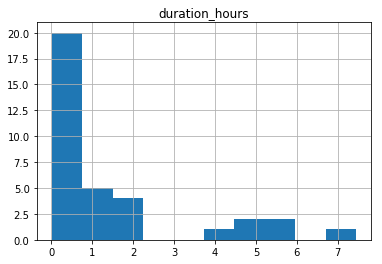

In [35]:
only_new_ones.hist(column = 'duration_hours', )

In [36]:
selection_column = 'InterpretedStartTime'
start_date = pd.Timestamp(year=2019, month=9, day=15)
cutoff_date = pd.Timestamp(year=2019, month=9, day=17)

# origin_data[origin_data[selection_column]  <= cutoff_date][origin_data[selection_column]>start_date]

origin_data[(origin_data[selection_column]  <= cutoff_date) & (origin_data[selection_column]>start_date)]

#.hist(column='duration_hours', bins=5)

,Ticketnumber,CREATE_TIME,First_Assignment,CLOSE_TIME,MoveToBackoffice,Minutes until Assignment,Minutes until Close,Minutes of Touchtime,InterpretedStartTime,InterpretedEndTime,duration,duration_hours
13,51155736,16.09.2019 09:50:07,16.09.2019 14:37:16,17.09.2019 07:54:31,NaN,287,1324,12.0,2019-09-16 09:50:07,2019-09-17 07:54:31,0 days 22:04:24,22.073333
14,51155748,16.09.2019 10:50:09,16.09.2019 11:15:42,17.09.2019 15:33:03,NaN,26,1723,5.0,2019-09-16 10:50:09,2019-09-17 15:33:03,1 days 04:42:54,28.715000
15,51155779,16.09.2019 14:10:07,16.09.2019 14:51:19,17.09.2019 08:14:06,NaN,41,1084,8.0,2019-09-16 14:10:07,2019-09-17 08:14:06,0 days 18:03:59,18.066389
16,51155784,16.09.2019 14:40:07,17.09.2019 10:07:58,17.09.2019 13:55:09,16.09.2019 15:39:52,1168,1395,6.0,2019-09-16 14:40:07,2019-09-17 13:55:09,0 days 23:15:02,23.250556
17,51155791,16.09.2019 15:30:08,17.09.2019 07:50:31,17.09.2019 07:50:50,16.09.2019 15:31:22,980,981,NaN,2019-09-16 15:30:08,2019-09-17 07:50:50,0 days 16:20:42,16.345000
18,51155798,16.09.2019 16:00:15,17.09.2019 16:16:53,17.09.2019 16:16:58,16.09.2019 16:18:57,1457,1457,10.0,2019-09-16 16:00:15,2019-09-17 16:16:58,1 days 00:16:43,24.278611
19,51155809,16.09.2019 18:20:07,17.09.2019 06:17:43,17.09.2019 06:17:45,NaN,718,718,NaN,2019-09-16 18:20:07,2019-09-17 06:17:45,0 days 11:57:38,11.960556


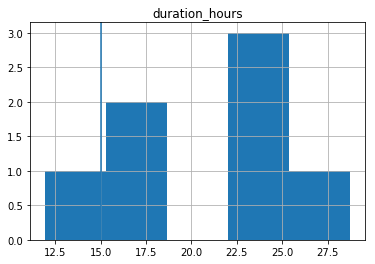

In [44]:
selection_column = 'InterpretedStartTime'
start_date = pd.Timestamp(year=2019, month=9, day=16)
cutoff_date = pd.Timestamp(year=2019, month=9, day=17)

# origin_data[origin_data[selection_column]  <= cutoff_date][origin_data[selection_column]>start_date]

origin_data[(origin_data[selection_column]  <= cutoff_date) & 
            (origin_data[selection_column]>start_date)].hist(column='duration_hours', bins=5)

plt.axvline(x=15, label = 'hallo')

In [39]:
from ipywidgets import interact, interactive, fixed, interact_manual

import ipywidgets as widgets

def show_the_hist(x):
    origin_data[(origin_data[selection_column]  <= cutoff_date) 
                & (origin_data[selection_column] > start_date)].hist(
        column='duration_hours', bins=x)
    # print( x )
    return 1
    
# interact(show_the_hist, x=10);